<a href="https://colab.research.google.com/github/bakowski/gateway-remote-config/blob/master/Copy_of_Copy_of_Copy_of_test_pref_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 : Machine Learning - Linear and Polynomial regression
# with TensorFlow and Keras

**1.1 Dataset**

Call **dataset()** function to get **X,y**


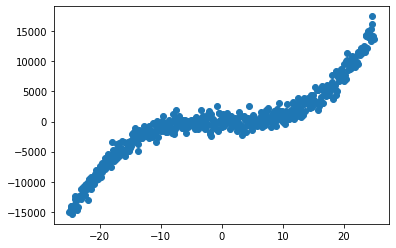

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def dataset(show=True):
  X = np.arange(-25, 25, 0.1)
  # Try changing y to a different function
  y = X**3 + 20 + np.random.randn(500)*1000
  if show:
    plt.scatter(X, y)
    plt.show()
  return X, y
  
X, y = dataset()


**1.1.1** Scaling **Dataset**

The maximum value of **y** in the **dataset** goes up to **15000** and the minimum values is less than **-15000**. The
range of y is very large which makes the convergence/loss reduction slower. So will we scale the data, scaling
the data will help the model converge faster. If all the features and target are in the same range, there will be
symmetry in the curve of **Loss** vs **weights/bias**, which makes the convergence faster.
We will do a very simple type of scaling, we will divide all the values of the data with the maximum values for **X**
and **y** respectively.

24.90000000000071 17492.29351567011 -25.0 -15346.965191911378
1.0 1.0 -1.0040160642569995 -0.877355801179709


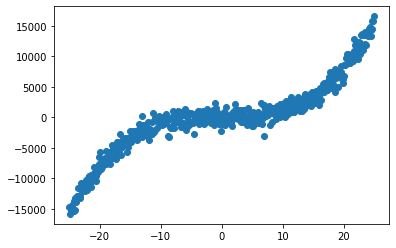

In [ ]:

print(max(X), max(y), min(X), min(y))
X = X/max(X)
y = y/max(y)
print(max(X), max(y), min(X), min(y))
X, y = dataset()


**1.2 Linear Regression in TensorFlow**

The example is run with 500 epochs.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
def dataset(show=True):
  X = np.arange(-25, 25, 0.1)edit
  # Try changing y to a different function
  y = X**3 + 20 + np.random.randn(500)*1000
  if show:
    plt.scatter(X, y)
    plt.show()
  return X, y

X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**1.2.1 Compiling and training**


Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0267


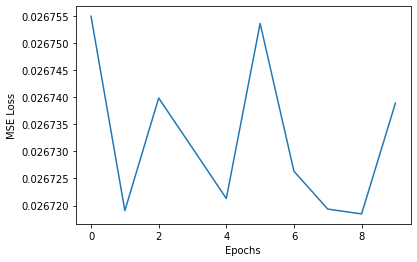

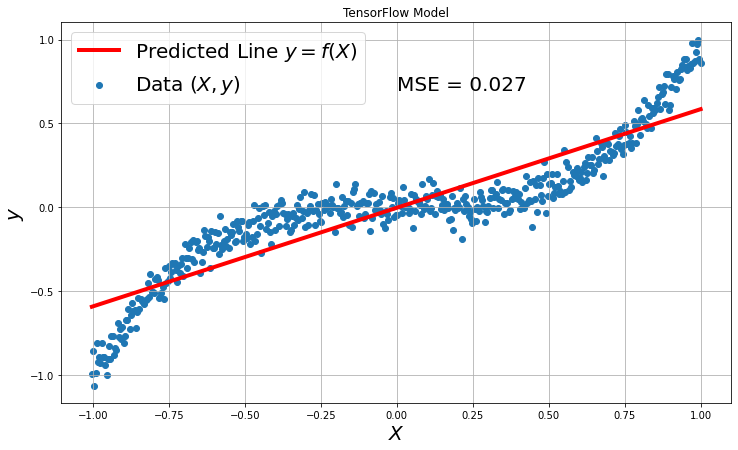

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_scaled, y_scaled, epochs=10, verbose=True)
plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_scaled)
plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_scaled, y_scaled, label='Data $(X, y)$')
plt.plot(X_scaled, y_hat, color='red', label='Predicted Line $y = f(X)$', linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

edit

**Exercise**

Change number of epochs to 100 and observe the result.


# 1.3 Polynomial Regression

When the dataset is not linear, linear regression cannot learn the dataset and make good predictions.
We need here a polynomial model which considered the polynomial terms as well.
We need terms like **x^2,x^3,...,x^n** for the model to learn a polynomial of nth degree.
>>>**y=w0+w1*x+w^2*x^2 +...+w^n*x^n**

One down side of this model is that, we have to decide the value of n. But this is better than a linear regression
model. We can get an idea of the value of n by visualizing a dataset, but for multi variable dataset, we will have
to try different values of n and check which is better.

**1.3.1 Polynomial Features**

We can calculate the polynomial features for each feature by programming it or we can try **sklearn.preprocessing.PolynomialFeatures** which allows us to make polynomial terms of our data.

We will try degree **2**, **3** and **4**


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
def dataset(show=True):
  X = np.arange(-25, 25, 0.1)
  # Try changing y to a different function
  y = X**3 + 20 + np.random.randn(500)*1000
  if show:
    plt.scatter(X, y)
    plt.show()
  return X, y

X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_2.shape)
print(X_2[0])
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_3 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_3.shape)
print(X_3[0])
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_4 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_4.shape)
print(X_4[0])


(500, 3)
[ 1.         -1.00401606  1.00804826]
(500, 4)
[ 1.         -1.00401606  1.00804826 -1.01209664]
(500, 5)
[ 1.         -1.00401606  1.00804826 -1.01209664  1.01616129]


The above tensors contain the weights for x x^2 x^3 and x^4 depending on the polynomial power to be used.


1.3.2 Polynomial Regression – degree 2 (with TensorFlow)

(500, 3)
[ 1.         -1.00401606  1.00804826]
Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 1.0063
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.9773
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 0.9500
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 0.9251
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.9016
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8803
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8594
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8405
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8219
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8042


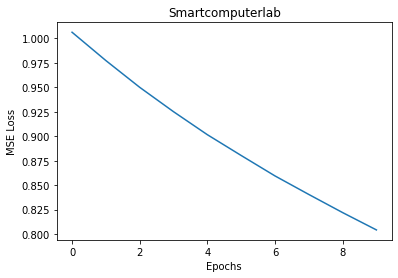

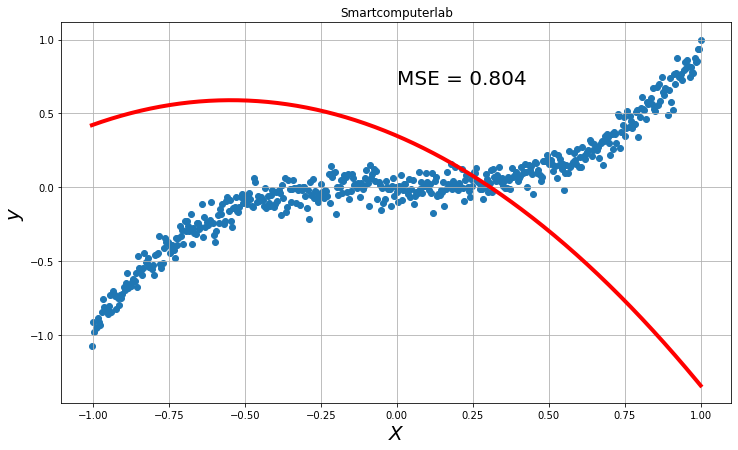

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
def dataset(show=True):
  X = np.arange(-25, 25, 0.1)
  # Try changing y to a different function
  y = X**3 + 20 + np.random.randn(500)*1000
  if show:
    plt.scatter(X, y)
  plt.show()
  return X, y
X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_2.shape)
print(X_2[0])

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[3])])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
#tf_history = model.fit(X_2, y_scaled, epochs=500, verbose=True)
tf_history = model.fit(X_2, y_scaled, epochs=10, verbose=True)
plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Smartcomputerlab')
plt.show()
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)
plt.figure(figsize=(12,7))
plt.title('Smartcomputerlab')
plt.scatter(X_2[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_2[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)



**Question**

Why is the polynomial regression with 2-d features look like a straight line?
Well because the model thinks that a straight line better fits the dataset than a parabola. If you train the model
for less epochs you can notice the model tries to fit the data with a parabola but it improves as it moves to a line.


**1.3.3 Tensorflow Model with 3rd Degree**


(500, 4)
[ 1.         -1.00401606  1.00804826 -1.01209664]
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 1.0469
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.9704
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.8989
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 0.8314
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7669
Epoch 6/20
16/16 [==============================] - 0s 1ms/step - loss: 0.7073
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6509
Epoch 8/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5978
Epoch 9/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5489
Epoch 10/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5030
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 0.4600
Epoch 12/20
16/16 [==============================] - 0s 1ms/step - los

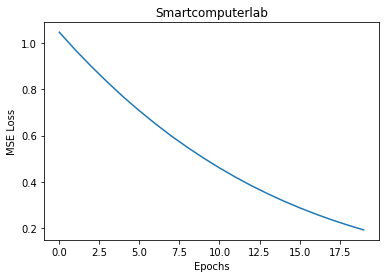

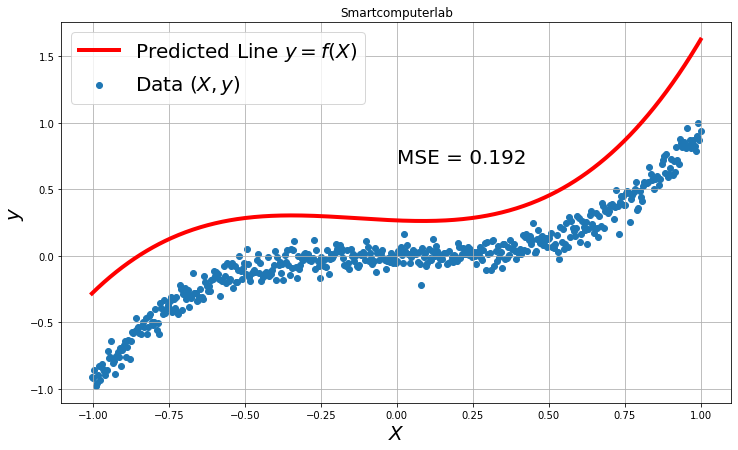

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
def dataset(show=True):
  X = np.arange(-25, 25, 0.1)
  # Try changing y to a different function
  y = X**3 + 20 + np.random.randn(500)*1000
  if show:
    plt.scatter(X, y)
    plt.show()
  return X, y

X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_3 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_3.shape)
print(X_3[0])

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[4])])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_3, y_scaled, epochs=20, verbose=True)
plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Smartcomputerlab')
plt.show()
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_3)
plt.figure(figsize=(12,7))
plt.title('Smartcomputerlab')
plt.scatter(X_3[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_3[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()



**Exercise:**
Try the same example with 10, 40,100, and 400 epochs
